<h2>Intitute-wise Metric calculation (Aggregate)</h2>

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from collections import Counter
from multiprocessing import Pool
import itertools
import json

In [2]:
import import_ipynb
from metric_util_func import *

importing Jupyter notebook from metric_util_func.ipynb


In [3]:
%matplotlib inline

In [4]:
folder="dataset_v5/v5_2/"

In [5]:
mod_ment2 = pd.read_csv(folder+'v5_2_2/'+'final_shodhganga_dataset_v5_2_2.csv', sep =",")

In [6]:
mod_ment2.columns

Index(['advisorId', 'researcherId', 'advId', 'resId', 'advisor_name',
       'researcher_name', 'publisher_dept', 'DepartmentId',
       'publisher_institution', 'instituteId', 'title', 'thesisId',
       'N_thesisId', 'date_submitted', 'new_date_awarded', 'dc.date.awarded',
       'dc.subject.ddc', 'uniq_ddc_across_dept', 'dc.description.abstract',
       'dc.title.alternative', 'N_DepartmentId_1', 'ddc_code', 'advisor_advId',
       'researcher_resId'],
      dtype='object')

In [7]:
#mod_ment2 = mod_ment2.dropna(subset=['new_date_awarded']).copy()

In [8]:
#mod_ment2 = pd.read_csv(folder+'final_shodhganga_dataset_v5_2.csv', sep =",")

In [9]:
mod_ment2.shape

(201477, 24)

In [10]:
graph1 = nx.convert_matrix.from_pandas_edgelist(mod_ment2, 'advId','resId','publisher_institution', create_using=nx.DiGraph())
graph1.remove_edges_from(nx.selfloop_edges(graph1))
cycle=list(nx.simple_cycles(graph1))
graph1.remove_edges_from(cycle)

In [11]:
len(cycle)

33

## No.of student graduated from institute (Or Institute wise thesis Advised).

In [12]:
inst_stud = set([(value['publisher_institution'],v) for ((u, v), value) in graph1.edges.items()])
attr_count=[i for i, s in inst_stud]

In [13]:
inst_wise_stud_dist=Counter(attr_count)

In [14]:
#inst_wise_stud_dist

In [15]:
top10, top10_dict=top_metric_val(inst_wise_stud_dist)

In [16]:
save_obj_inst('inst_thesis-advised', top10_dict)

file save successfully in folder : dataset_v5/v5_2/top_10/institute/


In [17]:
top10_dict

{'University of Calcutta': 9865,
 'Savitribai Phule Pune University': 8591,
 'V. B. S. Purvanchal University': 7064,
 'Aligarh Muslim University': 6619,
 'Anna University': 6612,
 'Panjab University': 6611,
 'University of Madras': 4910,
 'Dr. Babasaheb Ambedkar Marathwada University': 4659,
 'Jawaharlal Nehru University': 4542,
 'Gauhati University': 4381}

In [18]:
#top10_dict #this is without droping rows with 'new_date_awarded' column having null values.

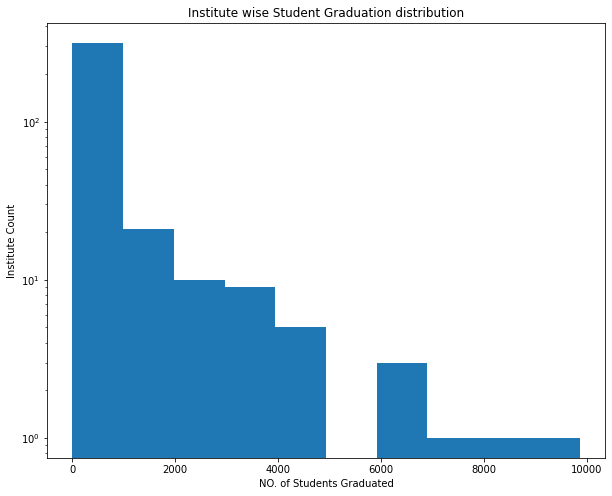

In [19]:
draw_dist_graph(inst_wise_stud_dist,title="Institute wise Student Graduation distribution",ylabel="Institute Count",xlabel="NO. of Students Graduated")

In [20]:
# deg, cnt = zip(*stud_grad_size_dist.items())
# fig, ax = plt.subplots(figsize=(10,6))
# plt.hist(deg, color="b", bins=np.arange(0,10000,100))
# plt.title("Institute wise student graduation distribution")
# plt.ylabel("Institute Count")
# plt.xlabel("Students Graduation Value")
# #ax.set_xticks([d for d in deg])
# #ax.set_xticklabels(deg)
# plt.show()

In [21]:
inst_wise_stud_dist['Savitribai Phule Pune University']

8591

<h2>Institute-wise Fecundity Distribution (Aggregated value of researcher)</h2>

In [22]:
fecundity_dist=load_obj(folder+"save_data/fecundity_dist.json")
fecundity_dist={int(key) : int(fecundity_dist[key]) for key in fecundity_dist}

In [23]:
#fecundity_dist['93541']

In [24]:
# def find_unique_values(df,col):
#     uniq_val=df[col].unique()
#     return uniq_val

In [25]:
# def inst_wise_val(df,col,dist_dict):
#     metric={}
#     uniq_col_val=find_unique_values(df,col)
#     for val in uniq_col_val:
#         filter_df=df[df[col]==val]
#         uniq_id = pd.unique(filter_df[['resId','advId']].values.ravel('K'))
#         metric_sum=sum([int(dist_dict[str(idd)]) for idd in uniq_id])
#         metric[val]=metric_sum
#     return metric

In [26]:
inst_fecund_metric=inst_wise_val(mod_ment2,'publisher_institution',fecundity_dist)

In [27]:
#inst_fecund_metric

In [28]:
top_10, top_10_dict=top_metric_val(inst_fecund_metric)

In [29]:
save_obj_inst('inst_fecundity',top10_dict)

file save successfully in folder : dataset_v5/v5_2/top_10/institute/


In [30]:
top_10_dict

{'University of Calcutta': 10279,
 'Savitribai Phule Pune University': 9481,
 'V. B. S. Purvanchal University': 7517,
 'Aligarh Muslim University': 7381,
 'Panjab University': 7056,
 'Anna University': 6760,
 'University of Madras': 5281,
 'Jawaharlal Nehru University': 4923,
 'Dr. Babasaheb Ambedkar Marathwada University': 4761,
 'Gauhati University': 4600}

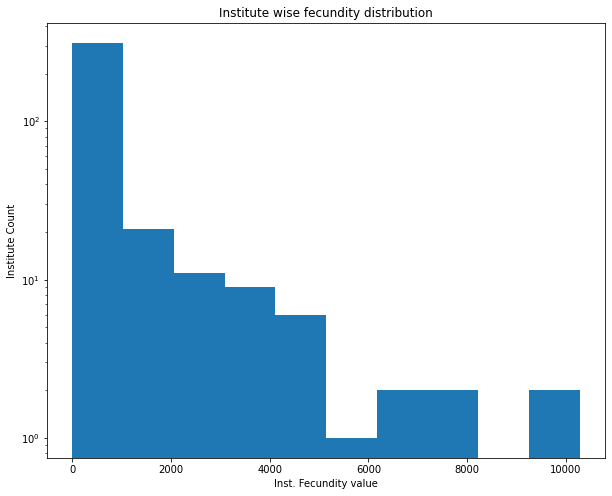

In [31]:
draw_dist_graph(inst_fecund_metric)

<h2>Institute-wise Fertility Distribution (Aggregated value of researcher)</h2>

In [32]:
fertility_dist=load_obj(folder+"save_data/fertility_dist.json")
fertility_dist={int(key) : int(fertility_dist[key]) for key in fertility_dist}

In [33]:
inst_fertility_metric=inst_wise_val(mod_ment2,'publisher_institution',fertility_dist)

In [34]:
top_10, top_10_dict=top_metric_val(inst_fertility_metric)

In [35]:
save_obj_inst('inst_fertility',top10_dict)

file save successfully in folder : dataset_v5/v5_2/top_10/institute/


In [36]:
top_10_dict

{'Anna University': 581,
 'Aligarh Muslim University': 552,
 'University of Calcutta': 441,
 'Bharathidasan University': 431,
 'Bharathiar University': 416,
 'Panjab University': 386,
 'Savitribai Phule Pune University': 378,
 'Manonmaniam Sundaranar University': 354,
 'Karnatak University': 311,
 'University of Madras': 279}

In [37]:
#draw_dist_graph(inst_fertility_metric,title='Institute wise fertility distribution',ylabel='Institute Count',xlabel='Inst. fertiltiy value',bin_size=np.arange(0,600,100))

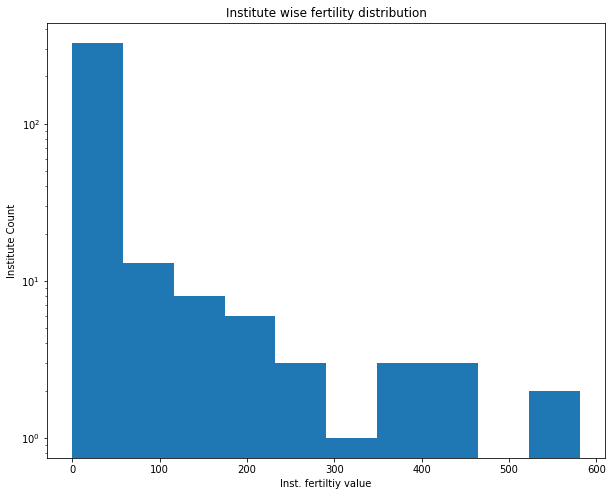

In [38]:
draw_dist_graph(inst_fertility_metric,title='Institute wise fertility distribution',ylabel='Institute Count',xlabel='Inst. fertiltiy value')

<h2>H-index</h2>

In [39]:
hindex_dist=load_obj(folder+"save_data/hindex_dict.json")
hindex_dist={int(key) : int(hindex_dist[key]) for key in hindex_dist}

In [40]:
inst_hindex_metric=inst_wise_val(mod_ment2,'publisher_institution',hindex_dist)

In [41]:
top_10, top_10_dict = top_metric_val(inst_hindex_metric)

In [42]:
save_obj_inst('inst_h-index',top10_dict)

file save successfully in folder : dataset_v5/v5_2/top_10/institute/


In [43]:
top_10_dict

{'Aligarh Muslim University': 495,
 'Anna University': 480,
 'University of Calcutta': 392,
 'Bharathidasan University': 340,
 'Savitribai Phule Pune University': 337,
 'Panjab University': 329,
 'Bharathiar University': 326,
 'Manonmaniam Sundaranar University': 276,
 'Karnatak University': 260,
 'University of Madras': 252}

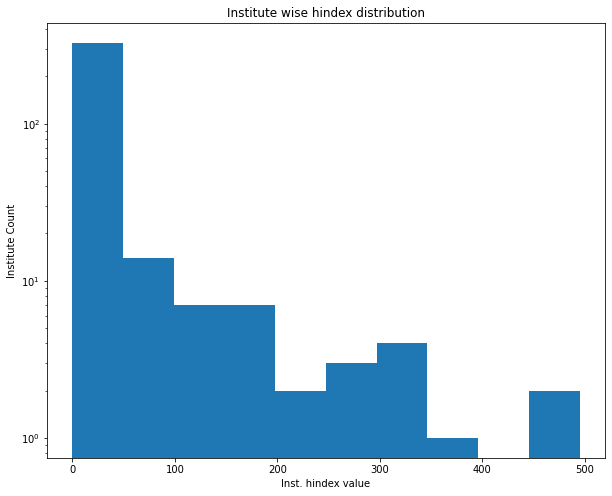

In [44]:
draw_dist_graph(inst_hindex_metric,title='Institute wise hindex distribution',ylabel='Institute Count',xlabel='Inst. hindex value')

<h2> G-index</h2>

In [45]:
gindex_dist=load_obj(folder+"save_data/gindex_dict.json")
gindex_dist={int(key) : int(gindex_dist[key]) for key in gindex_dist}

In [46]:
inst_gindex_metric=inst_wise_val(mod_ment2,'publisher_institution',gindex_dist)

In [47]:
top_10, top_10_dict = top_metric_val(inst_gindex_metric)

In [48]:
save_obj_inst('inst_g-index',top10_dict)

file save successfully in folder : dataset_v5/v5_2/top_10/institute/


In [49]:
top_10_dict

{'Aligarh Muslim University': 713,
 'Anna University': 639,
 'University of Calcutta': 549,
 'Panjab University': 469,
 'Savitribai Phule Pune University': 456,
 'Bharathidasan University': 436,
 'Karnatak University': 427,
 'Bharathiar University': 417,
 'V. B. S. Purvanchal University': 381,
 'Manonmaniam Sundaranar University': 366}

In [50]:
# top_10_dict 
# {'Aligarh Muslim University': 715,
#  'Anna University': 641,
#  'University of Calcutta': 552,
#  'Panjab University': 470,
#  'Savitribai Phule Pune University': 456,   #previous g-index result
#  'Bharathidasan University': 442,
#  'Karnatak University': 428,
#  'Bharathiar University': 421,
#  'V. B. S. Purvanchal University': 382,
#  'Manonmaniam Sundaranar University': 371}

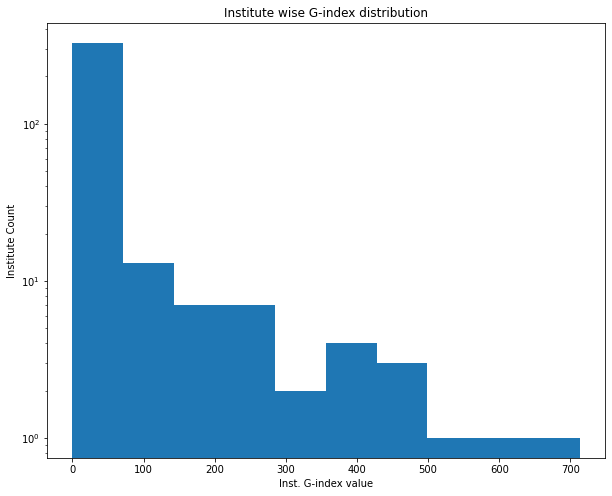

In [51]:
draw_dist_graph(inst_gindex_metric,title='Institute wise G-index distribution',ylabel='Institute Count',xlabel='Inst. G-index value')

In [52]:
metric_dist = Counter(inst_fertility_metric.values())

In [53]:
# tmp=0
# for key in metric_dist :
#     if key >= 58.1 and key < 116.2:
#         tmp=tmp+metric_dist[key]
# print(tmp)

In [54]:
#deg, cnt = zip(*metric_dist.items())

In [55]:
# counts, bins = np.histogram(list(inst_fertility_metric.values()))
# plt.hist(bins[:-1], bins, weights=counts)